# Preprocessing Data

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1YlMzVWrfSMk4RaF8p3D7PL_0vzYTv0zA')
#  Tampilkan 5 data pertama
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [121]:
# hapus atribut yang tidak digunakan
df.drop(["ammonia","is_safe"], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [122]:
df_scale = df.copy()

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(7999, 19)

In [123]:
data = pd.DataFrame(df_scale)
data.columns = df.columns
data_cluster = data.copy()
data.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.777700,-0.480829,1.054498,-0.993313,-0.711697,2.153450,-0.973005,-1.657455,-0.363210,-0.869100,-0.781349,1.129976,-0.348861,0.608826,1.203735,1.661506,1.053772,1.339112,-0.917139
1,1.307316,-0.599606,1.432783,-1.132020,1.208933,1.599174,-0.223194,0.295018,1.002641,0.850147,0.009461,-1.409284,1.046853,-0.739364,0.893326,0.124610,1.053772,0.851451,0.198010
2,0.271797,-0.480829,-0.812255,-0.965571,0.803769,1.044899,-1.202539,0.501751,-0.818494,-0.861165,-0.368752,0.783467,-0.383754,0.271779,1.912190,1.786352,0.706165,2.035772,-1.288855
3,0.548463,-0.480829,1.144957,-1.159762,1.968614,-0.802687,1.307032,0.708483,1.184755,1.008847,-1.434626,-1.517568,-0.069718,-0.402317,-0.415026,-0.516840,-1.031870,2.105438,0.198010
4,0.200655,-0.520421,-1.124751,-1.021054,0.192129,1.636126,-0.360915,-0.371120,-0.575676,-0.866455,0.301717,-0.555645,-0.383754,-0.739364,0.024861,-0.219792,-1.031870,-0.611535,-0.917139


In [124]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03
mean,-8.605027e-15,7.377966e-15,-6.992781e-16,-7.754836e-16,-1.618838e-15,-1.146768e-15,6.486179e-16,7.207636e-17,2.268192e-16,-7.153228e-16,-1.614188e-16,-2.169092e-16,1.623488e-16,-3.432684e-16,-7.468849e-16,-8.006680e-16,-2.191299e-16,1.568573e-14,-1.959060e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-5.265798e-01,-6.391978e-01,-1.289223e+00,-1.187503e+00,-8.480497e-01,-9.135419e-01,-1.233143e+00,-1.772306e+00,-9.702550e-01,-8.691004e-01,-1.709690e+00,-1.772036e+00,-2.320306e+00,-1.750507e+00,-9.306771e-01,-1.257305e+00,-1.727085e+00,-1.029530e+00,-1.660571e+00
25%,-4.949609e-01,-5.204211e-01,-8.287024e-01,-9.655714e-01,-8.090917e-01,-7.287834e-01,-1.095423e+00,-8.420100e-01,-9.702550e-01,-8.638104e-01,-8.844979e-01,-8.696689e-01,-5.756642e-01,-7.393643e-01,-8.079838e-01,-9.042923e-01,-1.031870e+00,-7.508665e-01,-9.171387e-01
50%,-4.712467e-01,-4.412366e-01,-3.106168e-01,-7.784528e-02,-6.415724e-01,-5.809766e-01,-8.547381e-02,-3.595296e-03,-3.025056e-01,-8.479404e-01,4.384384e-02,2.006460e-02,1.570854e-01,-6.526901e-02,-4.930520e-01,-2.197923e-01,1.095099e-02,-4.722027e-01,1.980101e-01
75%,-3.052475e-01,-2.432753e-01,7.502252e-01,7.543980e-01,8.037694e-01,7.123332e-01,8.938709e-01,8.922451e-01,8.812321e-01,9.823971e-01,8.862280e-01,8.646798e-01,7.502635e-01,9.458740e-01,7.361433e-01,7.531448e-01,7.061652e-01,6.424527e-01,9.414427e-01
max,3.465306e+00,3.517989e+00,2.773226e+00,2.418885e+00,2.533505e+00,2.412112e+00,1.827309e+00,1.673234e+00,2.064970e+00,1.775896e+00,1.728612e+00,1.806751e+00,2.791494e+00,1.619969e+00,2.462331e+00,2.182415e+00,1.748987e+00,2.453768e+00,1.684875e+00


# K-Means

Text(0, 0.5, 'Inertia')

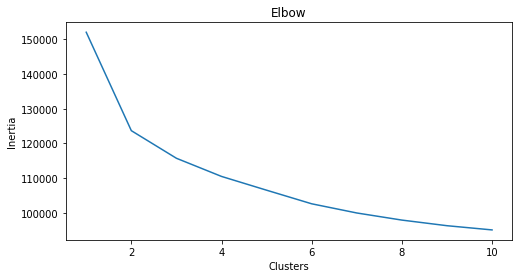

In [125]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [126]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,cluster_kmeans3,cluster_kmeans4
0,0.777700,-0.480829,1.054498,-0.993313,-0.711697,2.153450,-0.973005,-1.657455,-0.363210,-0.869100,-0.781349,1.129976,-0.348861,0.608826,1.203735,1.661506,1.053772,1.339112,-0.917139,0,3
1,1.307316,-0.599606,1.432783,-1.132020,1.208933,1.599174,-0.223194,0.295018,1.002641,0.850147,0.009461,-1.409284,1.046853,-0.739364,0.893326,0.124610,1.053772,0.851451,0.198010,0,3
2,0.271797,-0.480829,-0.812255,-0.965571,0.803769,1.044899,-1.202539,0.501751,-0.818494,-0.861165,-0.368752,0.783467,-0.383754,0.271779,1.912190,1.786352,0.706165,2.035772,-1.288855,0,3
3,0.548463,-0.480829,1.144957,-1.159762,1.968614,-0.802687,1.307032,0.708483,1.184755,1.008847,-1.434626,-1.517568,-0.069718,-0.402317,-0.415026,-0.516840,-1.031870,2.105438,0.198010,0,3
4,0.200655,-0.520421,-1.124751,-1.021054,0.192129,1.636126,-0.360915,-0.371120,-0.575676,-0.866455,0.301717,-0.555645,-0.383754,-0.739364,0.024861,-0.219792,-1.031870,-0.611535,-0.917139,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,-0.487056,-0.639198,0.314375,-0.077845,-0.809092,-0.802687,-1.187237,1.374621,-0.970255,-0.869100,1.677038,0.806928,-0.575664,-0.065269,-0.728827,-0.340333,1.401379,-0.611535,-0.545422,2,1
7995,-0.487056,-0.560013,-0.804032,-0.910089,-0.672739,-0.839639,-1.202539,1.627294,-0.970255,-0.869100,-1.176754,0.081426,-0.575664,-1.413460,-0.846997,-0.779446,1.401379,-0.332871,1.313159,2,1
7996,-0.455437,-0.639198,-0.787584,-0.355260,-0.828571,-0.728783,-1.202539,0.317988,-0.970255,-0.869100,1.419165,1.101100,-0.575664,-1.750507,-0.854347,0.826330,-1.727085,-0.750867,0.198010,2,1
7997,-0.518675,-0.599606,0.355493,-1.187503,-0.068890,-0.913542,-1.095423,-1.772306,-0.970255,-0.869100,-1.709690,-1.772036,-2.320306,-1.750507,-0.930677,-1.257305,-1.727085,-1.029530,-1.660571,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


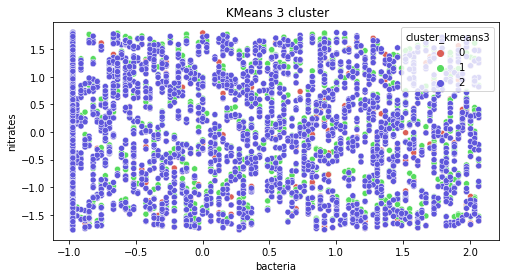

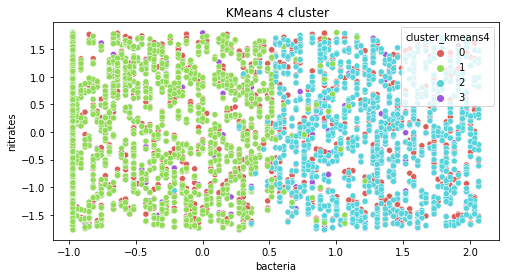

In [127]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['bacteria'], data_cluster['nitrates'],hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['bacteria'], data_cluster['nitrates'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

# Hierarchy

In [128]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

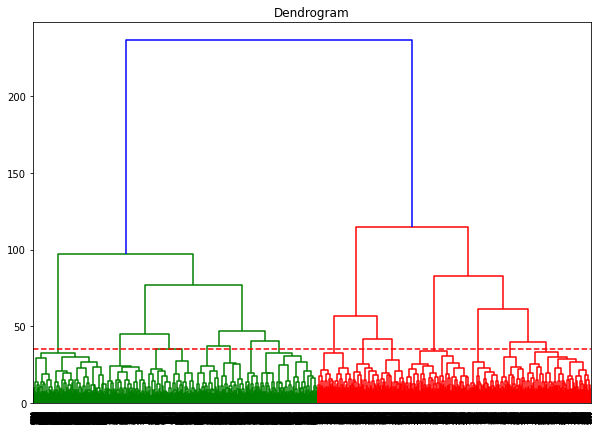

In [129]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

Text(0.5, 1.0, 'Hierarchy')

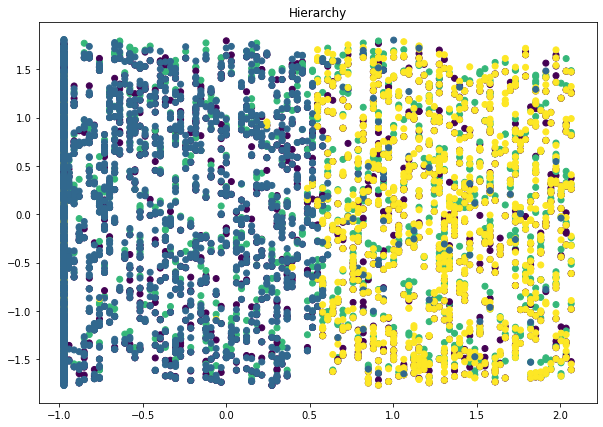

In [130]:
model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)

plt.figure(figsize=(10,7))
plt.scatter(data_cluster['bacteria'], data_cluster['nitrates'], c=model_agglo.labels_)
plt.title('Hierarchy')

# DBSCAN

In [131]:
from sklearn.cluster import DBSCAN

In [132]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [133]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,cluster_kmeans3,cluster_kmeans4,cluster_dbscan
0,0.777700,-0.480829,1.054498,-0.993313,-0.711697,2.153450,-0.973005,-1.657455,-0.363210,-0.869100,-0.781349,1.129976,-0.348861,0.608826,1.203735,1.661506,1.053772,1.339112,-0.917139,0,3,-1
1,1.307316,-0.599606,1.432783,-1.132020,1.208933,1.599174,-0.223194,0.295018,1.002641,0.850147,0.009461,-1.409284,1.046853,-0.739364,0.893326,0.124610,1.053772,0.851451,0.198010,0,3,-1
2,0.271797,-0.480829,-0.812255,-0.965571,0.803769,1.044899,-1.202539,0.501751,-0.818494,-0.861165,-0.368752,0.783467,-0.383754,0.271779,1.912190,1.786352,0.706165,2.035772,-1.288855,0,3,-1
3,0.548463,-0.480829,1.144957,-1.159762,1.968614,-0.802687,1.307032,0.708483,1.184755,1.008847,-1.434626,-1.517568,-0.069718,-0.402317,-0.415026,-0.516840,-1.031870,2.105438,0.198010,0,3,-1
4,0.200655,-0.520421,-1.124751,-1.021054,0.192129,1.636126,-0.360915,-0.371120,-0.575676,-0.866455,0.301717,-0.555645,-0.383754,-0.739364,0.024861,-0.219792,-1.031870,-0.611535,-0.917139,0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,-0.487056,-0.639198,0.314375,-0.077845,-0.809092,-0.802687,-1.187237,1.374621,-0.970255,-0.869100,1.677038,0.806928,-0.575664,-0.065269,-0.728827,-0.340333,1.401379,-0.611535,-0.545422,2,1,-1
7995,-0.487056,-0.560013,-0.804032,-0.910089,-0.672739,-0.839639,-1.202539,1.627294,-0.970255,-0.869100,-1.176754,0.081426,-0.575664,-1.413460,-0.846997,-0.779446,1.401379,-0.332871,1.313159,2,1,-1
7996,-0.455437,-0.639198,-0.787584,-0.355260,-0.828571,-0.728783,-1.202539,0.317988,-0.970255,-0.869100,1.419165,1.101100,-0.575664,-1.750507,-0.854347,0.826330,-1.727085,-0.750867,0.198010,2,1,-1
7997,-0.518675,-0.599606,0.355493,-1.187503,-0.068890,-0.913542,-1.095423,-1.772306,-0.970255,-0.869100,-1.709690,-1.772036,-2.320306,-1.750507,-0.930677,-1.257305,-1.727085,-1.029530,-1.660571,2,1,-1


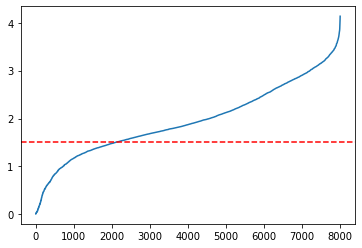

In [134]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

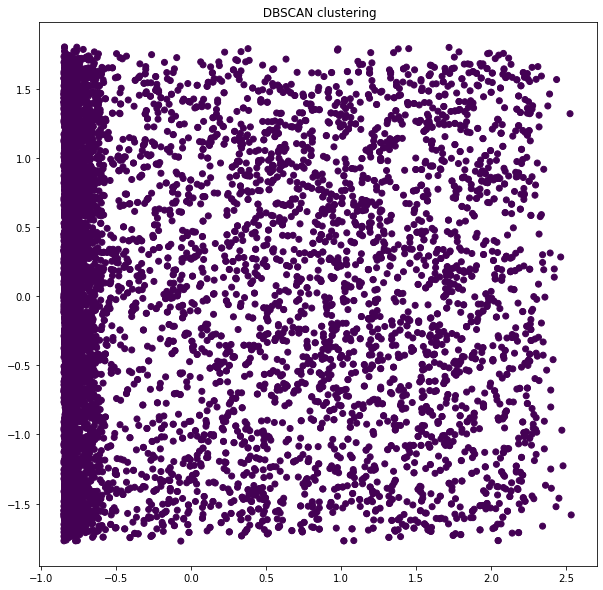

In [135]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=10)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data_cluster['chloramine'], data_cluster['nitrates'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()